In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys


def gen_LUT (a,c):
  r = np.arange(256)
  LUT = np.clip(a * r + c, 0, 255).astype(np.uint8)
  return LUT

def apply_LUT (img, LUT):
  return cv.LUT(img, LUT)



In [ ]:
def gen_LUT_tres_tramos(a1,c1,x1t2,a2,c2,x2t2,a3,c3):
  r1 = np.arange(x1t2)
  r2 = np.arange(x1t2,x2t2)
  r3 = np.arange(x2t2,256)
  LUT1 = np.clip(a1 * r1 + c1, 0, 255).astype(np.uint8)
  LUT2 = np.clip(a2 * r2 + c2, 0,255).astype(np.uint8)
  LUT3 = np.clip(a3 * r3 + c3, 0, 255).astype(np.uint8)
  LUT = np.concatenate((LUT1, LUT2, LUT3))
  return LUT


In [ ]:
def gen_LUT_dos_tramos(a1,c1,x1t1,a2,c2):
  r1= np.arange(0,x1t1)
  r2 = np.arange(x1t1,256)

  LUT1 = np.clip(a1 * r1 + c1, 0, 255).astype(np.uint8)
  LUT2 = np.clip(a2 * r2 + c2, 0, 255).astype(np.uint8)
  LUT = np.concatenate((LUT1, LUT2))
  return LUT

Mounted at /content/drive


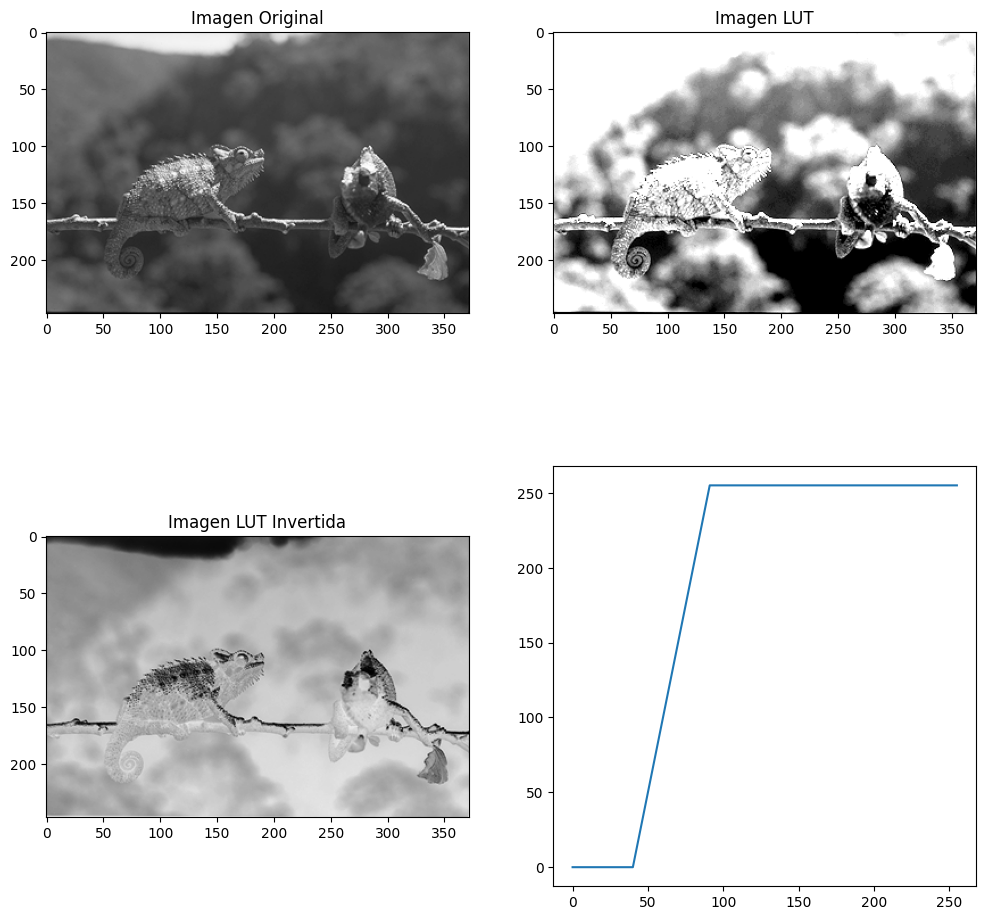

In [ ]:
escaladegrises= np.arange(256)
img_camaleon = cv.imread("/content/drive/My Drive/Datasets_pdi/Imagenes/camaleon.tif")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
ax[0,0].imshow(img_camaleon)
ax[0,0].set_title("Imagen Original")
lutcamaleon=gen_LUT(5,-200)
ax[0,1].imshow(apply_LUT(img_camaleon, lutcamaleon))
ax[0,1].set_title("Imagen LUT")
lutcamaleon_invertida=gen_LUT(-1,255)
ax[1,0].imshow(apply_LUT(img_camaleon, lutcamaleon_invertida))
ax[1,0].set_title("Imagen LUT Invertida")
ax[1,1].plot(escaladegrises,lutcamaleon)



(0.0, 300.0)

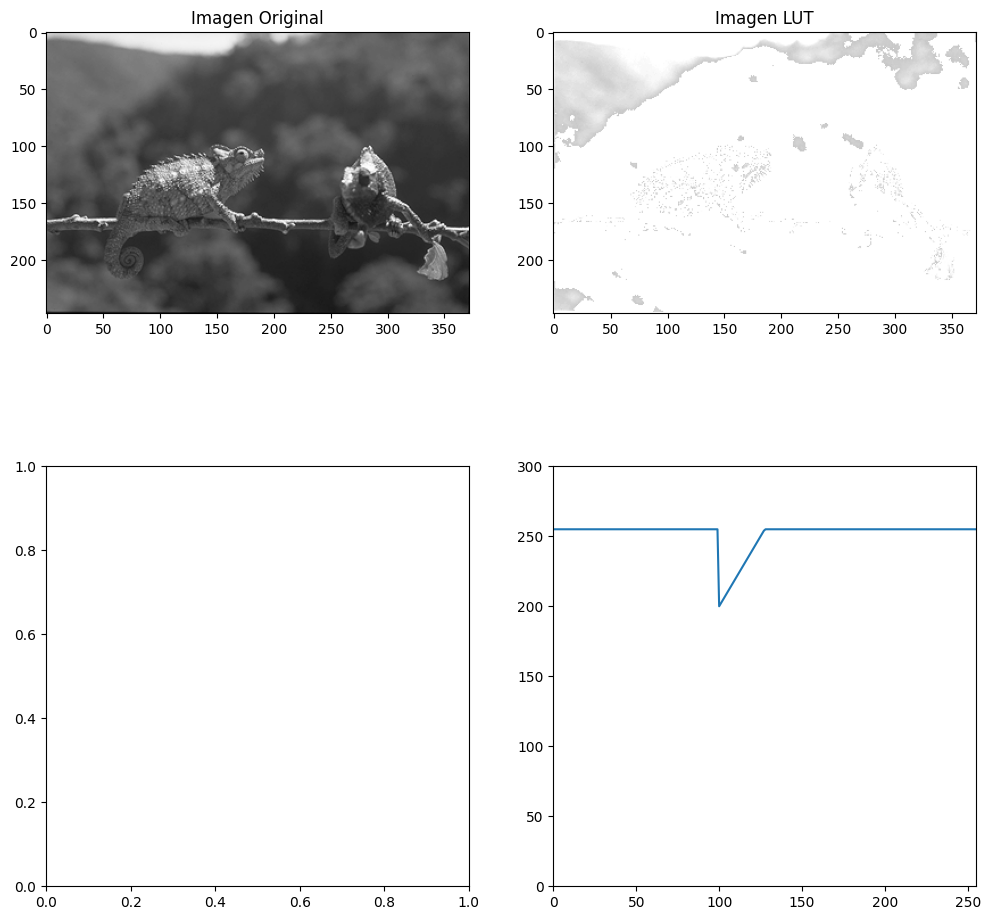

In [ ]:
escaladegrises= np.arange(256)
img_camaleon = cv.imread("/content/drive/My Drive/Datasets_pdi/Imagenes/camaleon.tif")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
ax[0,0].imshow(img_camaleon)
ax[0,0].set_title("Imagen Original")

lutcamaleon=gen_LUT_tres_tramos(0,255,100,2,0,200,0,255)
ax[0,1].imshow(apply_LUT(img_camaleon, lutcamaleon))
ax[0,1].set_title("Imagen LUT")
ax[1,1].plot(lutcamaleon)
ax[1, 1].set_xlim([0, 255])  # Establece los límites del eje x
ax[1, 1].set_ylim([0, 300])

# Ejercicio2

In [ ]:
def LUT_transf_log(c):
    r = np.arange(256)
    LUT = np.clip(c*np.log(1 + r),0,255).astype(np.uint8)
    return LUT



In [ ]:
def LUT_tansf_potencia(c,lam):
    r = np.arange(256)
    LUT = np.clip(c * r**lam,0,255).astype(np.uint8)
    return LUT


(256, 256, 3)


Text(0.5, 1.0, 'Imagen log')

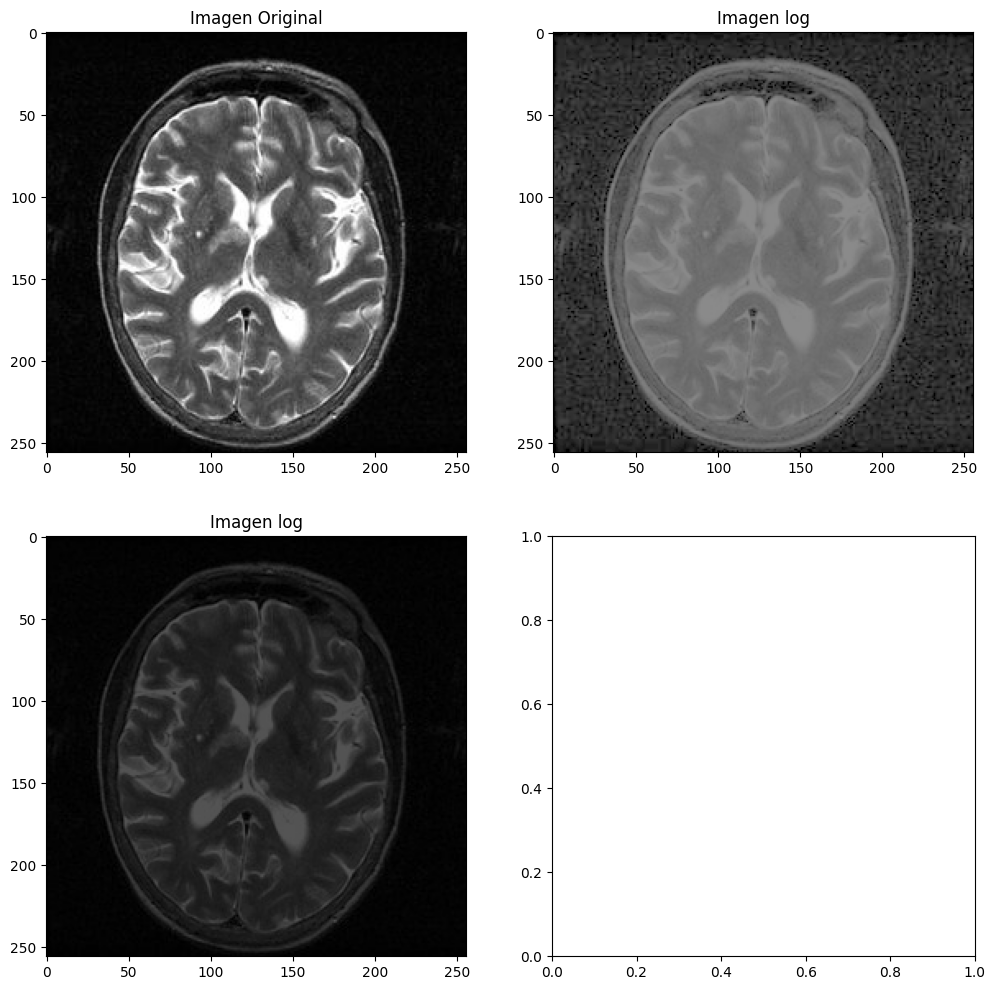

In [ ]:
img_camaleon = cv.imread("/content/drive/My Drive/Datasets_pdi/Imagenes/rmn.jpg")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
ax[0,0].imshow(img_camaleon)
ax[0,0].set_title("Imagen Original")

ax[0,1].imshow(apply_LUT(img_camaleon, LUT_transf_log(25)))
ax[0,1].set_title("Imagen log")

ax[1,0].imshow(apply_LUT(img_camaleon, LUT_tansf_potencia(1,0.8)))
ax[1,0].set_title("Imagen log")

# Ejercicio 3

In [ ]:
def suma_de_imagenes(img):
  max_h=max(i.shape[0] for i in img)
  max_w=max(i.shape[1] for i in img)
  channels = img[0].shape[2]
  suma = np.zeros((max_h, max_w, channels), dtype=np.float32)
  for i in img:
    h, w, _ = i.shape
    suma[:h, :w, :] += i
  img_norma=suma/len(img)
  img_norma=np.clip(img_norma,0,255).astype(np.uint8)
  return img_norma

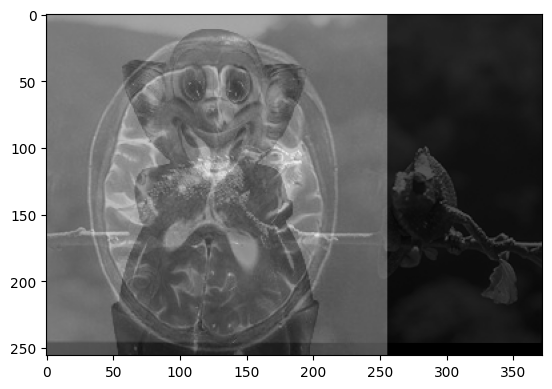

In [ ]:
from matplotlib import pyplot as plt
img_cerebro = cv.imread("/content/drive/My Drive/Datasets_pdi/Imagenes/rmn.jpg")
img_camaleon = cv.imread("/content/drive/My Drive/Datasets_pdi/Imagenes/camaleon.tif")
img_payaso = cv.imread("/content/drive/My Drive/Datasets_pdi/Imagenes/clown.jpg")

imagenes=[img_cerebro,img_camaleon,img_payaso]
plt.imshow(suma_de_imagenes(imagenes))


# Resta

In [3]:
def diferencia_opcion_uno(img1,img2):
    h, w, c = img1.shape
    img2 = cv.resize(img2, (w, h))  # Redimensiona img2 si es necesario

    # Calcular la diferencia
    diferencia = img1.astype(np.float32) - img2.astype(np.float32)

    # Opción 1: Reescalado sumando 255 y dividiendo por 2
    img_norma_1 = (diferencia + 255) / 2
    img_norma_1 = np.clip(img_norma_1, 0, 255).astype(np.uint8)

    # Opción 2: Restar el mínimo y escalar a 255
    img_min = np.min(diferencia)
    img_max = np.max(diferencia)
    img_norma_2 = (diferencia - img_min) / (img_max - img_min) * 255
    img_norma_2 = np.clip(img_norma_2, 0, 255).astype(np.uint8)

    return img_norma_1, img_norma_2


Text(0.5, 1.0, 'Imagen Diferencia opcion2')

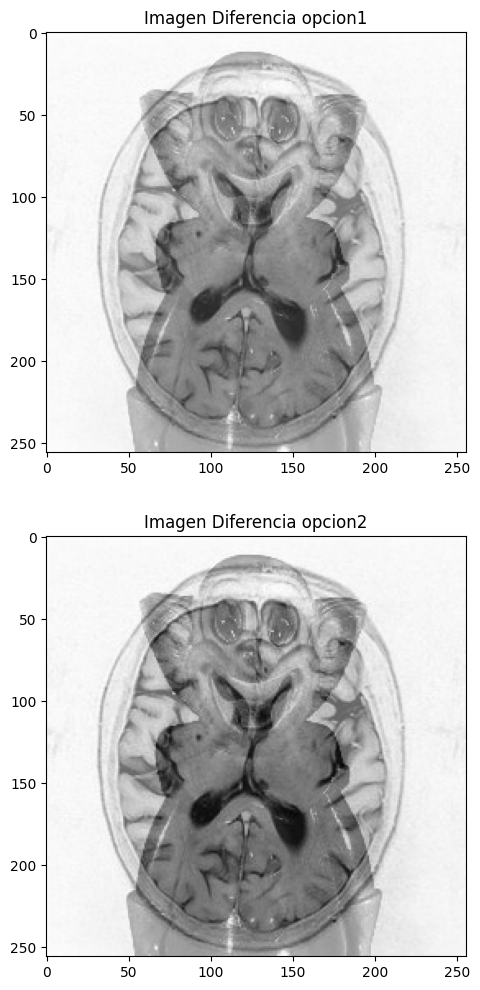

In [4]:
img_payaso = cv.imread(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\clown.jpg")
img_cerebro = cv.imread(r"C:\Users\pablo\Desktop\PDI\PDI\Imagenes\rmn.jpg")
img1,img2=diferencia_opcion_uno(img_payaso,img_cerebro)
fig, ax = plt.subplots(nrows=2, figsize=(12,12))
ax[0].imshow(img1)
ax[0].set_title("Imagen Diferencia opcion1")
ax[1].imshow(img2)
ax[1].set_title("Imagen Diferencia opcion2")


# Multiplicación de imágenes

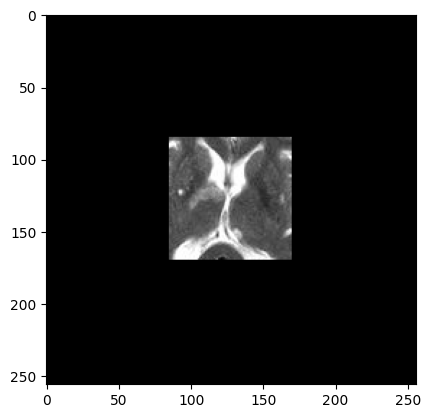

In [6]:
mask = np.zeros(img_cerebro.shape,img_cerebro.dtype)
H=img_cerebro.shape[0]
W=img_cerebro.shape[1]
mask[int(H/3):int(2*H/3),int(W/3):int(2*W/3)]=255 # Máscara rectangular
#operación AND pixel a pixel
img_recorte=cv.bitwise_and(img_cerebro,mask)
plt.imshow(img_recorte)
plt.show()